# Canadian Housing Market Forecasting: Time Series Analysis with VAR
## Vector Autoregression: VAR (Multivariate Model #1 of 2) 

 

### Introduction and Hypothesis 

## Introduction
We have seen issues in the housing market such as the financial crisis of 2008 that impacted the American economy for some years. Our analysis will look at the long-term trends in the Canadian housing market to give us some indication of the future trends, such as a similar crash.

## Hypothesis
We will take both qualitative and quantitative data in order to make a conclusion for the future. How we are using two different models to acheive an understanding of multivariate analysis and how to pick the best predictive tool. Our hypothesis is that the Canadian housing market will experience a downturn similar to the American Housing Crash of 2008.

## DataSets and Feature Selection 

In order to prove our analysis we will utilize various sources. We will utilize data from the Bank of Canada, from Statistics Canada and from news sources. This Jupyter Notebook specifically will focus on the first of two multivariate forecasting models: VAR. Vector Autoregression will be discussed in the next section. For our feature selection we will use Residential Mortgage figures, The Housing Affordability Index, Prime rate figures and
figures outlining the 5-year Conventional mortgage in Canada.  

### Why Utilize VAR? A brief Introduction to multivariate analysis

In this study we will compare two different multivariate tools to pick the best. In this Jupyter notebook we will focus on the VAR model. The VAR model is designed for multivariate analysis, which is suitable for a predictive analysis that requires more than one variable. 
VAR model, each variable is modeled as a linear combination of past values of itself and the past values of other variables in the system. 

In an analysis of the Canadian Housing market, we have multiple time series that influence each other, thus we use vector autoregression modeled as a system of equations with one equation per variable (time series). Specifically, we have Residential Mortgage figures, The Housing Affordability Index, Prime rate figures and figures outlining the 5-year Conventional mortgage- that all influence each other.  Therefore the VAR is a good choice for our Canadian Housing Market analysis. 

### Vector Autoregression (VAR) – Prerequisties and Steps. 

If we are to utilize the VAR model, there is a number of steps that must be followed specifically. The data must have stationarity and should be passed into the model after a cointegration test. 

1) Read in the data. As normal, we read in the data. 

2) Clean the data, and slice as needed for dates that match between our various CSV from the Bank of Canada and Statistics Canada. 

3) Perform Augmented Dickey Fuller / Stationary Test. An ADF Stationarity test is required for a VAR model to work properly. If the data is non-stationary, then it will not fit our analysis properly. 

4) Perform 1st Differencing: In this step we will perform a light differencing method in order to achieve stationarity. However, we must check first to see if all features are now stationary. 

5) Check Stationary Again:  An ADF Stationarity test is required again to test the data. 

6) Perform Cointegration Test:  A Cointegration test can be performed to check for influence or causal factors amongst our Housing Market features. 

7) Run the model  

8) Take the Inverse Difference

9) Plot the Data 

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd 
from pathlib import Path 
%matplotlib inline
import seaborn as sns



# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
# Import the Seaborn library
import seaborn as sns

# Data Ingestion and Data Cleaning
Description: 

In [3]:
#csv for mortgage rates chartered_bank_interest.csv
#ingest the csv 
#take all dates after 1975-01-01
#take only the column named 5-year Conventional mortgage
df_chartered_bank_i = pd.read_csv('../Resources/Datasets/chartered_bank_interest.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
df_chartered_bank_i.head()

,Prime rate,1-year Conventional mortgage,3-year Conventional mortgage,5-year Conventional mortgage,1-year GIC,3-year GIC,5-year GIC,5-year personal fixed term,"Daily Interest Savings (balances over $100,000)",Non-Chequable Savings Deposits
date,,,,,,,,,,
1967-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
1967-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
1967-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
1967-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
1967-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5


In [4]:
# Convert daily data to monthly through the resample function
df_chartered_bank_i.index = pd.to_datetime(df_chartered_bank_i.index)
df_chartered_bank_i_cleaned = df_chartered_bank_i.resample('1Q').mean()
df_chartered_bank_i_cleaned.tail()

,Prime rate,1-year Conventional mortgage,3-year Conventional mortgage,5-year Conventional mortgage,1-year GIC,3-year GIC,5-year GIC,5-year personal fixed term,"Daily Interest Savings (balances over $100,000)",Non-Chequable Savings Deposits
date,,,,,,,,,,
2020-12-31,2.45,3.090000,3.556154,4.79,0.350000,0.600000,0.857692,0.700000,0.01,0.01
2021-03-31,2.45,2.813077,3.490000,4.79,0.315385,0.530769,0.853846,0.700000,0.01,0.01
2021-06-30,2.45,2.790000,3.490000,4.79,0.250000,0.553846,1.003846,0.700000,0.01,0.01
2021-09-30,2.45,2.790000,3.490000,4.79,0.250000,0.600000,1.000000,0.700000,0.01,0.01
2021-12-31,2.45,2.790000,3.490000,4.79,0.261111,0.616667,1.020000,0.764444,0.01,0.01


In [5]:
df_chartered_bank_i_cleaned.head()

,Prime rate,1-year Conventional mortgage,3-year Conventional mortgage,5-year Conventional mortgage,1-year GIC,3-year GIC,5-year GIC,5-year personal fixed term,"Daily Interest Savings (balances over $100,000)",Non-Chequable Savings Deposits
date,,,,,,,,,,
1967-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000
1967-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000
1967-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000
1968-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653846
1968-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [6]:
df_chartered_bank_i_cleaned.drop(df_chartered_bank_i_cleaned.columns.difference(['5-year Conventional mortgage', 'Prime rate']), 1, inplace=True)
df_chartered_bank_i_cleaned.head()

,Prime rate,5-year Conventional mortgage
date,,
1967-06-30,NaN,NaN
1967-09-30,NaN,NaN
1967-12-31,NaN,NaN
1968-03-31,NaN,NaN
1968-06-30,NaN,NaN


In [7]:
# Data ingestion - reading the CSV in from Statistics Canada and the Bank of Canada
# Credit liabilities of households.csv
# Residential mortgages 9+
df_Residential_mortgages = pd.read_csv('../Resources/Datasets/Credit liabilities of households.csv')
df_Residential_mortgages.head()

,Date,1/1/1990,2/1/1990,3/1/1990,4/1/1990,5/1/1990,6/1/1990,7/1/1990,8/1/1990,9/1/1990,...,12/1/2020,1/1/2021,2/1/2021,3/1/2021,4/1/2021,5/1/2021,6/1/2021,7/1/2021,8/1/2021,9/1/2021
0,Non-mortgage loans,121607,121404,122358,122922,123435,124132,124492,124806,125752,...,787490,780670,779984,779926,783466,787770,792582,793265,798152,802793
1,Chartered banks 1,77976,77819,78386,78566,78941,79564,80005,80526,81519,...,575885,571698,572927,575120,578333,581681,586632,587778,591617,595916
2,Personal loans 1 2,31781,31769,31878,32099,32316,32539,32687,32805,32854,...,113070,115030,115131,114723,115259,115462,116026,116245,116837,117381
3,Of which: Auto loans 1 2,0,0,0,0,0,0,0,0,0,...,90763,90156,89902,90276,90681,90911,91542,91917,92298,92252
4,Credit cards 1 2,9090,8768,8728,8883,9050,9232,9310,9516,9788,...,78388,73786,73374,74232,74249,75221,76422,77223,78335,79324


In [8]:
# Transpose 
res_mortgage_transp = df_Residential_mortgages.T
res_mortgage_transp.tail()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
5/1/2021,787770,581681,115462,90911,75221,318851,62921,30930,41217,206089,...,1979730,1706049,1297499,408550,9831,2998,6833,263850,255930,7920
6/1/2021,792582,586632,116026,91542,76422,320569,62921,31755,41860,205950,...,2005633,1730211,1316993,413218,9930,3048,6882,265492,257648,7844
7/1/2021,793265,587778,116245,91917,77223,321720,62908,30647,41943,205487,...,2022115,1745650,1331064,414586,9866,2979,6887,266599,258812,7787
8/1/2021,798152,591617,116837,92298,78335,323665,63073,30564,42216,206535,...,2038954,1760664,1344247,416417,9848,2949,6899,268442,260592,7850
9/1/2021,802793,595916,117381,92252,79324,325793,63514,30895,42523,206877,...,2052272,1772201,1354213,417988,9883,2953,6930,270188,262279,7909


In [9]:
# Remove unwanted columns
res_mortgage_transp = res_mortgage_transp.truncate(before='35', after='35', axis=1)
res_mortgage_transp.tail()

,35
5/1/2021,1706049
6/1/2021,1730211
7/1/2021,1745650
8/1/2021,1760664
9/1/2021,1772201


In [10]:
# Reset index and change headers
res_mortgage_transp = res_mortgage_transp.reset_index(drop=False)
new_header = res_mortgage_transp.iloc[0] #grab the first row for the header
res_mortgage_transp = res_mortgage_transp[1:] #take the data less the header row
res_mortgage_transp.columns = new_header #set the header row as the dataframe header
res_mortgage_transp.tail()

,Date,Residential mortgages 14
377,5/1/2021,1706049
378,6/1/2021,1730211
379,7/1/2021,1745650
380,8/1/2021,1760664
381,9/1/2021,1772201


In [11]:
# Rename the columns
res_mortgage_transp = res_mortgage_transp.rename(columns={'Residential mortgages 14': 'Residential Mortgages'})

In [12]:
# Review data types
res_mortgage_transp.dtypes

0
Date                     object
Residential Mortgages    object
dtype: object

In [13]:
res_mortgage_transp.tail()

,Date,Residential Mortgages
377,5/1/2021,1706049
378,6/1/2021,1730211
379,7/1/2021,1745650
380,8/1/2021,1760664
381,9/1/2021,1772201


In [14]:
# Convert data types to required format
res_mortgage_transp['Date'] = res_mortgage_transp['Date'].astype('datetime64[ns]')
res_mortgage_transp['Residential Mortgages'] = res_mortgage_transp['Residential Mortgages'].astype(float)
res_mortgage_transp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 1 to 381
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   381 non-null    datetime64[ns]
 1   Residential Mortgages  381 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [15]:
res_mortgage_transp.tail()

,Date,Residential Mortgages
377,2021-05-01,1706049.0
378,2021-06-01,1730211.0
379,2021-07-01,1745650.0
380,2021-08-01,1760664.0
381,2021-09-01,1772201.0


In [16]:
# Convert monthly data to quarterly 
res_mortgage_transp.Date = pd.to_datetime(res_mortgage_transp.Date)

#setting the index to the Date column 
res_mortgage_transp.set_index('Date', inplace=True)
res_mortgage_transp.tail()


,Residential Mortgages
Date,
2021-05-01,1706049.0
2021-06-01,1730211.0
2021-07-01,1745650.0
2021-08-01,1760664.0
2021-09-01,1772201.0


In [17]:
#using resample to take Quarterly data 
res_mortgage_cleaned = res_mortgage_transp.resample('1Q').mean()

In [18]:
# Combined dataframe = 1 + 2 + 3 
res_mortgage_cleaned.tail()

,Residential Mortgages
Date,
2020-09-30,1.604927e+06
2020-12-31,1.639785e+06
2021-03-31,1.661492e+06
2021-06-30,1.708387e+06
2021-09-30,1.759505e+06


In [19]:
res_mortgage_cleaned['Residential Mortgages']=res_mortgage_cleaned['Residential Mortgages'].apply(lambda x:round(x,2))
res_mortgage_cleaned.tail()

,Residential Mortgages
Date,
2020-09-30,1604927.33
2020-12-31,1639785.00
2021-03-31,1661491.67
2021-06-30,1708387.33
2021-09-30,1759505.00


In [20]:
#take the csv in 
#extract this column name: Credit liabilities of households 1 2 3
#extract this column name: Residential mortgages 9 
#flip the row into a column (transpose method)
#since the dates won't match, we need to add null values

In [21]:
# House afforability index 
df_House_afford_index  = pd.read_csv('../Resources/Datasets/AffordabilityIndex date.csv')
df_House_afford_index.head()

,Date,New housing price index,Housing Affordability Index
0,1980-09-1,NaN,0.420
1,1980-12-1,NaN,0.461
2,1981-03-1,NaN,0.482
3,1981-06-1,NaN,0.534
4,1981-09-1,NaN,0.626


In [22]:
#here we will be doing some cleaning from this dataset and taking only the Housing Affordability Index
df_House_afford_index = df_House_afford_index.drop(columns=['New housing price index'])
df_House_afford_index.tail()

,Date,Housing Affordability Index
160,2020-09-1,0.315
161,2020-12-1,0.337
162,2021-03-1,0.347
163,2021-06-1,0.363
164,2021-09-1,NaN


In [23]:
df_House_afford_index.tail()

,Date,Housing Affordability Index
160,2020-09-1,0.315
161,2020-12-1,0.337
162,2021-03-1,0.347
163,2021-06-1,0.363
164,2021-09-1,NaN


In [24]:
# Review data types
df_House_afford_index.dtypes

Date                            object
Housing Affordability Index    float64
dtype: object

In [25]:
df_House_afford_index['Date'] = df_House_afford_index['Date'].astype('datetime64[ns]')
df_House_afford_index.dtypes


Date                           datetime64[ns]
Housing Affordability Index           float64
dtype: object

In [26]:
df_House_afford_index.set_index('Date', inplace=True)
df_House_afford_index_cleaned = df_House_afford_index.resample('1Q').last()

In [27]:
df_House_afford_index_cleaned.head()

,Housing Affordability Index
Date,
1980-09-30,0.420
1980-12-31,0.461
1981-03-31,0.482
1981-06-30,0.534
1981-09-30,0.626


In [28]:
#check null values 
res_mortgage_cleaned.isnull().sum()
#drop null values 




0
Residential Mortgages    0
dtype: int64

In [29]:
#check again for null values 
df_House_afford_index_cleaned.isnull().sum()

#removing null values 
df_House_afford_index_cleaned = df_House_afford_index_cleaned.dropna().copy()

#check again for null values 
df_House_afford_index_cleaned.isnull().sum()

Housing Affordability Index    0
dtype: int64

In [30]:
df_House_afford_index_cleaned.tail()

,Housing Affordability Index
Date,
2020-06-30,0.300
2020-09-30,0.315
2020-12-31,0.337
2021-03-31,0.347
2021-06-30,0.363


In [31]:
#check again for null values 
df_chartered_bank_i_cleaned.isnull().sum()



Prime rate                      31
5-year Conventional mortgage    31
dtype: int64

In [32]:
#removing null values 
df_chartered_bank_i_cleaned = df_chartered_bank_i_cleaned.dropna().copy()

#check again for null values 
df_chartered_bank_i_cleaned.isnull().sum()

Prime rate                      0
5-year Conventional mortgage    0
dtype: int64

In [33]:
print(df_chartered_bank_i_cleaned.head())
print(df_chartered_bank_i_cleaned.tail())

            Prime rate  5-year Conventional mortgage
date                                                
1975-03-31    9.807692                     11.250000
1975-06-30    9.000000                     10.807692
1975-09-30    9.173077                     11.403846
1975-12-31    9.750000                     12.000000
1976-03-31    9.903846                     11.846154
            Prime rate  5-year Conventional mortgage
date                                                
2020-12-31        2.45                          4.79
2021-03-31        2.45                          4.79
2021-06-30        2.45                          4.79
2021-09-30        2.45                          4.79
2021-12-31        2.45                          4.79


In [34]:
#slice only the dates from 1990-03-31 TO 2021-06-30

df_chartered_bank_i_cleaned = df_chartered_bank_i_cleaned['1990-03-31' :'2021-06-30']
print(df_chartered_bank_i_cleaned.head())
print(df_chartered_bank_i_cleaned.tail())

            Prime rate  5-year Conventional mortgage
date                                                
1990-03-31   13.846154                     12.423077
1990-06-30   14.634615                     14.096154
1990-09-30   14.480769                     13.769231
1990-12-31   13.519231                     12.980769
1991-03-31   11.826923                     11.865385
            Prime rate  5-year Conventional mortgage
date                                                
2020-06-30        2.45                      4.993846
2020-09-30        2.45                      4.854286
2020-12-31        2.45                      4.790000
2021-03-31        2.45                      4.790000
2021-06-30        2.45                      4.790000


In [35]:
# for Housing Affordability Index
#slice only the dates from 1990-03-31 TO 2021-06-30

df_House_afford_index_cleaned = df_House_afford_index_cleaned['1990-03-31' :'2021-06-30']
print(df_House_afford_index_cleaned.head())
print(df_House_afford_index_cleaned.tail())



            Housing Affordability Index
Date                                   
1990-03-31                        0.479
1990-06-30                        0.527
1990-09-30                        0.494
1990-12-31                        0.467
1991-03-31                        0.434
            Housing Affordability Index
Date                                   
2020-06-30                        0.300
2020-09-30                        0.315
2020-12-31                        0.337
2021-03-31                        0.347
2021-06-30                        0.363


In [36]:
# for Residential Mortgages
#we slice only the dates from 1990-03-31 TO 2021-06-30

res_mortgage_cleaned = res_mortgage_cleaned['1990-03-31' :'2021-06-30']
print(res_mortgage_cleaned.head())
print(res_mortgage_cleaned.tail())



0           Residential Mortgages
Date                             
1990-03-31              229940.67
1990-06-30              236727.00
1990-09-30              242165.67
1990-12-31              246922.00
1991-03-31              250729.33
0           Residential Mortgages
Date                             
2020-06-30             1575288.33
2020-09-30             1604927.33
2020-12-31             1639785.00
2021-03-31             1661491.67
2021-06-30             1708387.33


In [37]:
res_mortgage_cleaned.tail()

,Residential Mortgages
Date,
2020-06-30,1575288.33
2020-09-30,1604927.33
2020-12-31,1639785.00
2021-03-31,1661491.67
2021-06-30,1708387.33


In [38]:
#combine into a single dataframe
 
housing_analysis_combined_df = pd.concat([res_mortgage_cleaned, df_House_afford_index_cleaned, df_chartered_bank_i_cleaned], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
housing_analysis_combined_df.sort_index(inplace=True)

# Display a few rows
housing_analysis_combined_df.head()


,Residential Mortgages,Housing Affordability Index,Prime rate,5-year Conventional mortgage
1990-03-31,229940.67,0.479,13.846154,12.423077
1990-06-30,236727.00,0.527,14.634615,14.096154
1990-09-30,242165.67,0.494,14.480769,13.769231
1990-12-31,246922.00,0.467,13.519231,12.980769
1991-03-31,250729.33,0.434,11.826923,11.865385


In [39]:
#Now we have a combined dataframe with all the feature variables 
housing_analysis_combined_df.tail()

,Residential Mortgages,Housing Affordability Index,Prime rate,5-year Conventional mortgage
2020-06-30,1575288.33,0.300,2.45,4.993846
2020-09-30,1604927.33,0.315,2.45,4.854286
2020-12-31,1639785.00,0.337,2.45,4.790000
2021-03-31,1661491.67,0.347,2.45,4.790000
2021-06-30,1708387.33,0.363,2.45,4.790000


<AxesSubplot:>

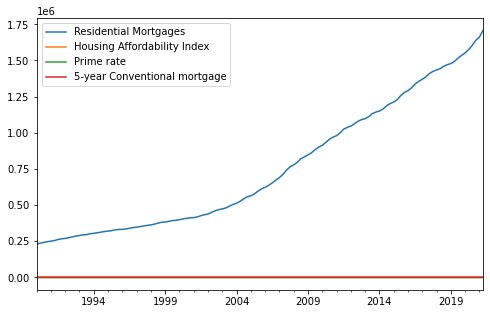

In [40]:
housing_analysis_combined_df.plot(figsize = (8,5))

 

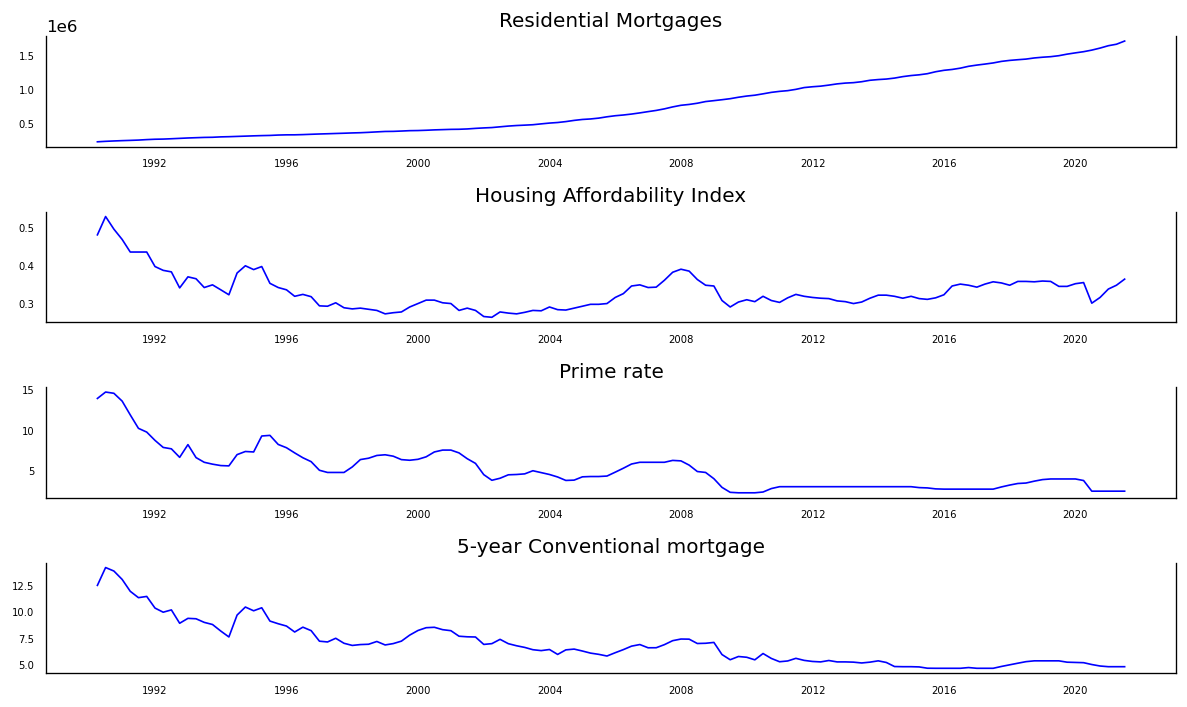

In [41]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = housing_analysis_combined_df[housing_analysis_combined_df.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(housing_analysis_combined_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [42]:
#Next steps: 

#Testing Causation using Granger’s Causality Test

In [43]:
from statsmodels.tsa.stattools import grangercausalitytests


In [44]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

df_grangers = grangers_causation_matrix(housing_analysis_combined_df, variables = housing_analysis_combined_df.columns) 
df_grangers

,Residential Mortgages_x,Housing Affordability Index_x,Prime rate_x,5-year Conventional mortgage_x
Residential Mortgages_y,1.0000,0.1751,0.2488,0.2808
Housing Affordability Index_y,0.0514,1.0000,0.0487,0.0286
Prime rate_y,0.0018,0.0007,1.0000,0.0003
5-year Conventional mortgage_y,0.0227,0.0488,0.0002,1.0000


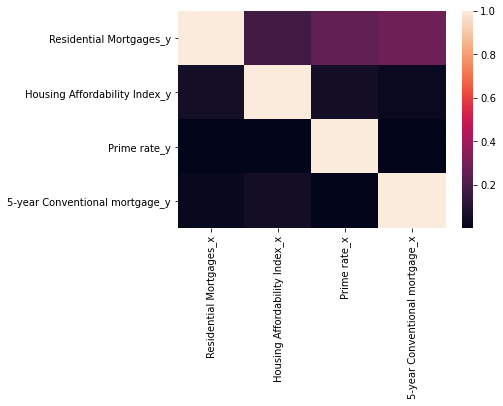

In [45]:
# visualization of grangers causality matrix with heatmap. 
ax = sns.heatmap(df_grangers)


##Cointegration Testing

Why perform Cointegration Testing? Well if multiple time series are being compared over a longer duration (such as in this example), we can garner that there is a statistically significant relationship. Vector Autoregression(VAR) models depend on this type of statistically long term relationship between variables.  

In [46]:
## cointegration test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(housing_analysis_combined_df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Residential Mortgages ::  52.54     > 40.1749   =>   True
Housing Affordability Index ::  27.68     > 24.2761   =>   True
Prime rate ::  13.19     > 12.3212   =>   True
5-year Conventional mortgage ::  5.35      > 4.1296    =>   True


In [47]:
from statsmodels.tsa.stattools import adfuller
# Store the results of the test in the variable result

In [48]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [49]:
for name, column in housing_analysis_combined_df[['Residential Mortgages', 'Housing Affordability Index', 'Prime rate',
       '5-year Conventional mortgage']].iteritems():
    Augmented_Dickey_Fuller_Test_func(housing_analysis_combined_df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Residential Mortgages
Test Statistic                   3.125303
p-value                          1.000000
No Lags Used                    10.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Housing Affordability Index
Test Statistic                  -2.565432
p-value                          0.100354
No Lags Used                     7.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Prime rate
Test Statistic                  -2.109331

In [50]:
#Residential Mortgages ADF
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary



result = adfuller(housing_analysis_combined_df['Residential Mortgages'])
# Access the contents of the results:
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: 3.125303
p-value:        1.000000 
Lags used:      10
Critical Values:
('1%', -3.4885349695076844)
('5%', -2.887019521656941)
('10%', -2.5803597920604915)


In [51]:
# Housing Affordability Index
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary

result = adfuller(housing_analysis_combined_df['Housing Affordability Index'])
# Access the contents of the results:
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -2.565432
p-value:        0.100354 
Lags used:      7
Critical Values:
('1%', -3.4870216863700767)
('5%', -2.8863625166643136)
('10%', -2.580009026141913)


In [52]:
# 5-year Conventional mortgage
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
result = adfuller(housing_analysis_combined_df['5-year Conventional mortgage'])
# Access the contents of the results:
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -2.431415
p-value:        0.133065 
Lags used:      13
Critical Values:
('1%', -3.4901313156261384)
('5%', -2.8877122815688776)
('10%', -2.5807296460459184)


In [53]:
#1st differencing Residential Mortgages
data_d = housing_analysis_combined_df.diff().dropna()
adfuller_test = adfuller(data_d['Residential Mortgages'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: 0.27827647677122896
p-value: 0.9763255756738312


In [54]:
#1st differencing Housing Affordability Index
data_d = housing_analysis_combined_df.diff().dropna()
adfuller_test = adfuller(data_d['Housing Affordability Index'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -4.654513070321905
p-value: 0.00010236562615111616


In [55]:
#1st differencing 5-year Conventional mortgage
data_d = housing_analysis_combined_df.diff().dropna()
adfuller_test = adfuller(data_d['5-year Conventional mortgage'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -5.388781575498016
p-value: 3.575903785590714e-06


## Run ADF Test After Differencing

In [56]:
for name, column in data_d[['Residential Mortgages', 'Housing Affordability Index', 'Prime rate',
       '5-year Conventional mortgage']].iteritems():
    Augmented_Dickey_Fuller_Test_func(data_d[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Residential Mortgages
Test Statistic                   0.278276
p-value                          0.976326
No Lags Used                    11.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Housing Affordability Index
Test Statistic                  -4.654513
p-value                          0.000102
No Lags Used                     6.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Prime rate
Test Statistic                  -4.867385
p-value    

## Plot Data after Augmented Dickey Fuller Test (Stationarity Test) 

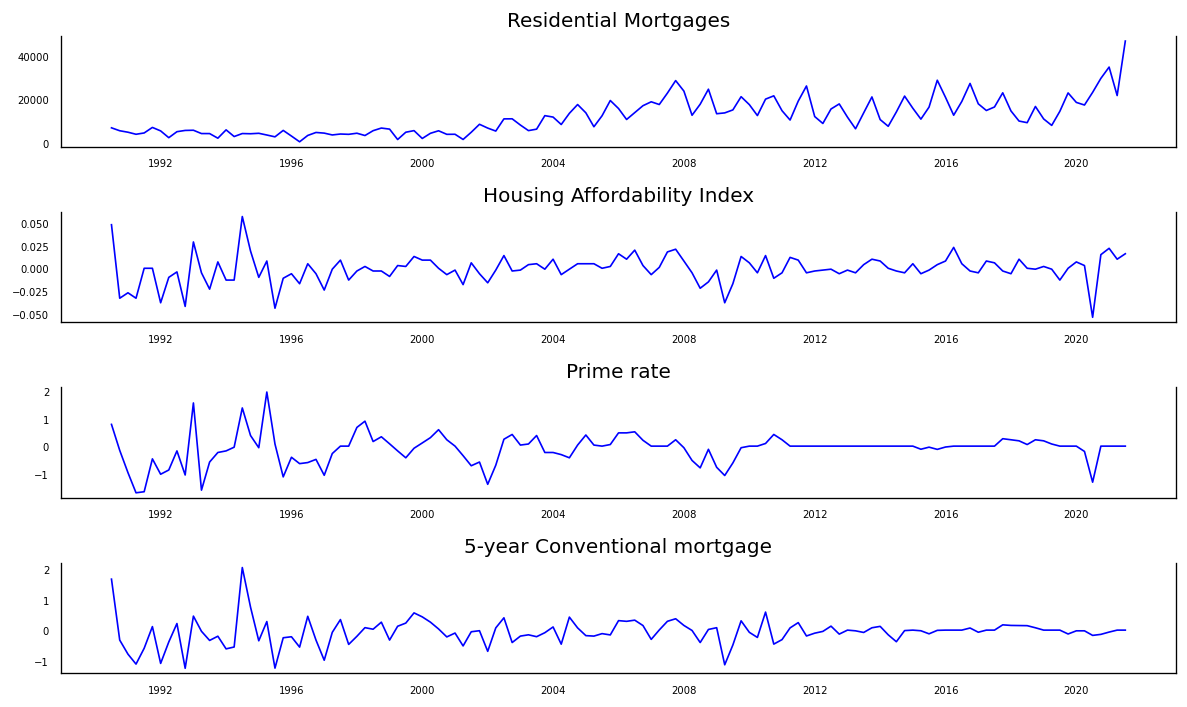

In [57]:
# Plotting after the stationary has been established
fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = data_d[data_d.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(housing_analysis_combined_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

##  Create a scatter plot of the data

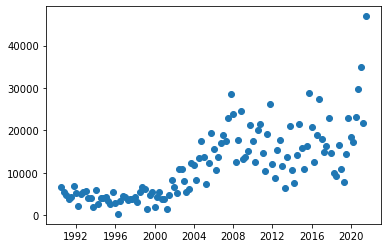

In [58]:
# Create a scatter plot of the data
plt.scatter(data_d.index, data_d['Residential Mortgages'])


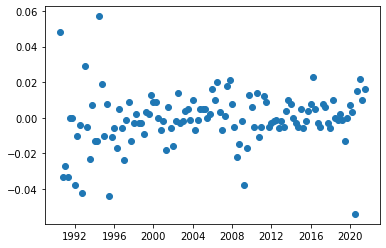

In [59]:
plt.scatter(data_d.index, data_d['Housing Affordability Index'])


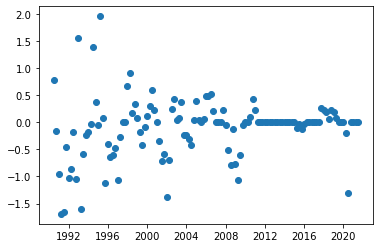

In [60]:
plt.scatter(data_d.index, data_d['Prime rate'])


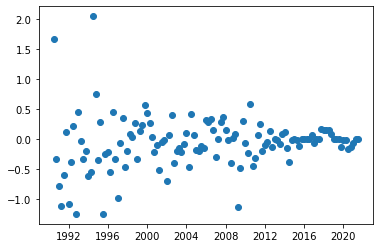

In [61]:
plt.scatter(data_d.index, data_d['5-year Conventional mortgage'])

## Split the data into Training and Testing sets.
Here we split  the dataset into training and test data. The VAR model will be fitted on df_train and then used to forecast the next 10 quarters of the Canadian Housing Market 

In [62]:
# train-test split of the data and keep the last 10 quarters as test data
nobs = 25
df_train = data_d["1996-09-30":"2021-06-30"]
df_test = data_d.iloc[:nobs]

In [63]:
df_test.tail()

,Residential Mortgages,Housing Affordability Index,Prime rate,5-year Conventional mortgage
1995-06-30,2623.00,-0.044,0.076923,-1.247692
1995-09-30,5589.34,-0.011,-1.115385,-0.250769
1995-12-31,2980.33,-0.006,-0.403846,-0.217692
1996-03-31,330.00,-0.017,-0.634615,-0.557692
1996-06-30,3263.33,0.005,-0.596154,0.453846


In [64]:
df_train.head()

,Residential Mortgages,Housing Affordability Index,Prime rate,5-year Conventional mortgage
1996-09-30,4643.34,-0.006,-0.480769,-0.326923
1996-12-31,4337.00,-0.024,-1.057692,-0.988462
1997-03-31,3493.66,-0.001,-0.269231,-0.073077
1997-06-30,3923.00,0.009,0.000000,0.346154
1997-09-30,3783.00,-0.013,0.000000,-0.469231


In [65]:
# print out the shape in order to check that we have 10 quarters for testing data
print(df_train.shape)  
print(df_test.shape)  

(100, 4)
(25, 4)


In [66]:
forecasting_model = VAR(df_train)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

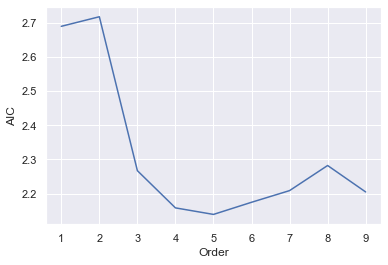

In [67]:
# From visual judgement, it seems should be between 4 and 5

sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [68]:
# auto selection of best lag can be different than from visual judgement
forecasting_model.select_order(10)
results_auto = forecasting_model.fit(maxlags = 10, ic = "aic")
lag_order = results_auto.k_ar
lag_order

10

In [69]:
results = forecasting_model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Dec, 2021
Time:                     22:50:59
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.97429
Nobs:                     96.0000    HQIC:                   2.89210
Log likelihood:          -580.450    FPE:                    8.78433
AIC:                      2.15788    Det(Omega_mle):         4.57594
--------------------------------------------------------------------
Results for equation Residential Mortgages
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
const                                 246.040848      1089.564180            0.226           0.821
L1.Residential Mortgages                0.564360         0.122438      

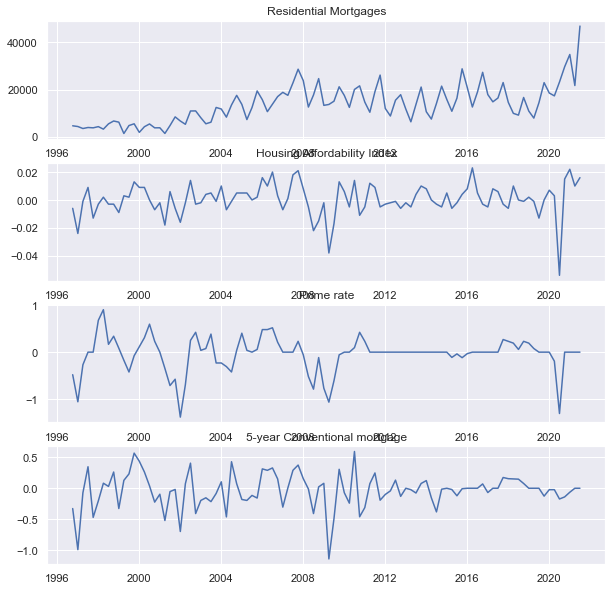

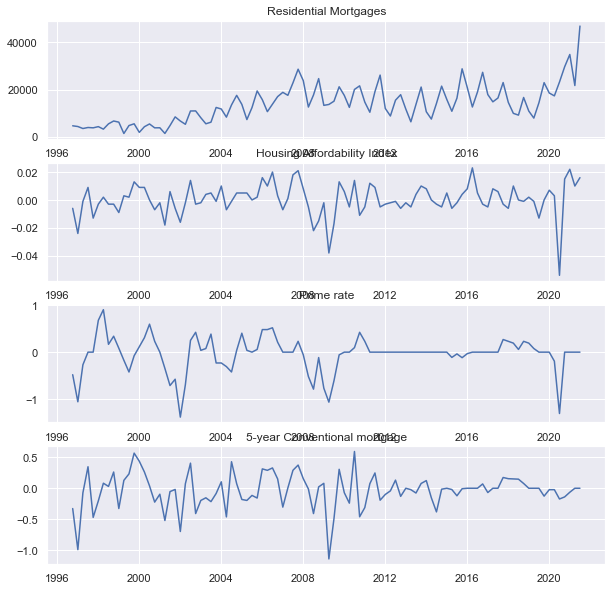

In [70]:
results.plot()

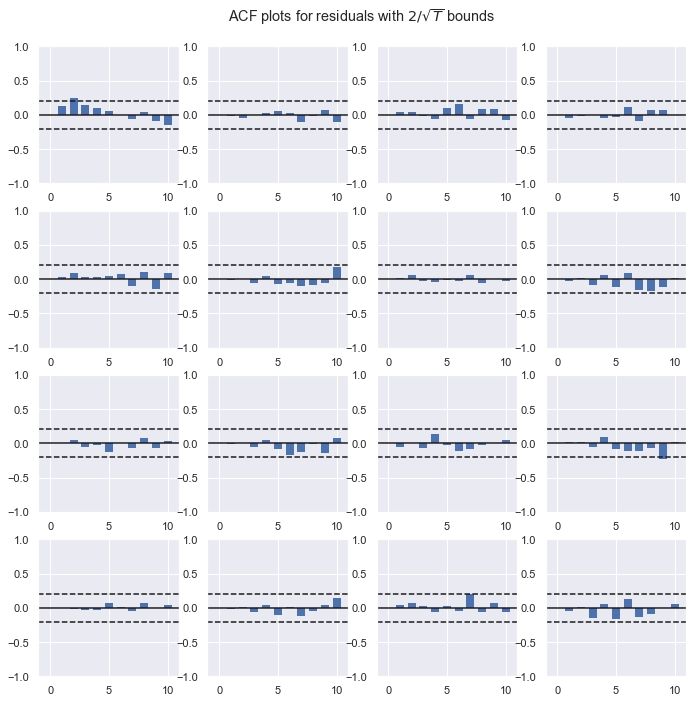

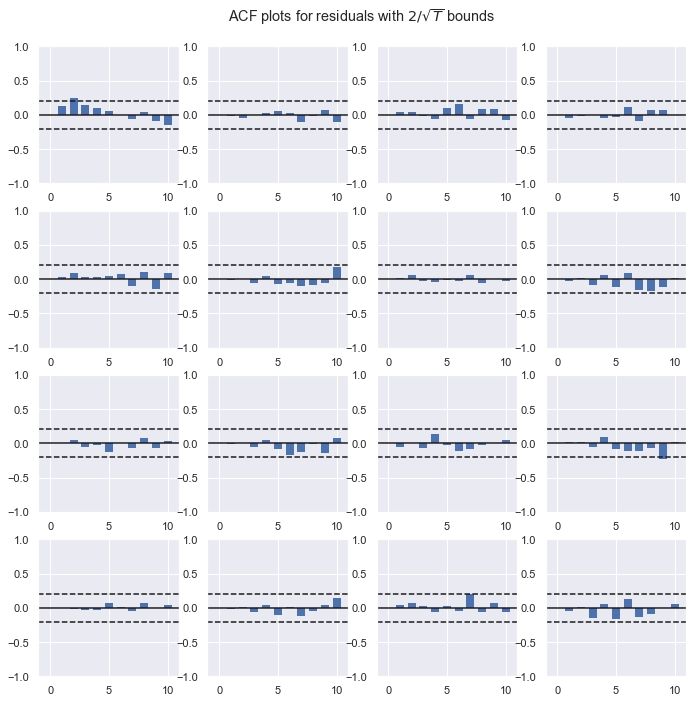

In [71]:
results.plot_acorr()

In [72]:
df_train.tail()

,Residential Mortgages,Housing Affordability Index,Prime rate,5-year Conventional mortgage
2020-06-30,23177.33,-0.054,-1.307692,-0.173077
2020-09-30,29639.00,0.015,0.000000,-0.139560
2020-12-31,34857.67,0.022,0.000000,-0.064286
2021-03-31,21706.67,0.010,0.000000,0.000000
2021-06-30,46895.66,0.016,0.000000,0.000000


In [73]:
lagged_values = df_train.values[-4:]
# forecast = pd.DataFrame(results.forecast(y= lagged_values, steps=10), index = test.index, columns= ['realgdp_1d', 'realdpi_1d'])
# forecast

fc = results.forecast(y=lagged_values, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_train.index[-nobs:], columns=df_train.columns + '_2d')
df_forecast

,Residential Mortgages_2d,Housing Affordability Index_2d,Prime rate_2d,5-year Conventional mortgage_2d
2015-06-30,45200.386752,0.007990,0.358820,0.175181
2015-09-30,30597.847023,0.012606,0.143056,-0.112967
2015-12-31,31011.758685,0.003607,-0.127907,0.018443
2016-03-31,41915.053705,-0.000299,0.069648,0.034340
2016-06-30,44697.453723,0.005905,0.072309,0.028523
2016-09-30,34061.611210,0.008909,-0.034497,-0.026983
2016-12-31,34672.721509,0.004263,-0.211489,-0.053781
2017-03-31,44359.422144,0.001565,-0.158614,0.078501
2017-06-30,45494.368237,0.006036,-0.010435,0.015833
2017-09-30,38388.440393,0.008204,-0.077138,-0.062531


In [74]:
# Invert the transformation to get the real forecast

In [75]:
forecast_1D = df_forecast.copy()
df_forecast["Residential Mortgages_forecasted"] = housing_analysis_combined_df["Residential Mortgages"].iloc[-10-1] + forecast_1D['Residential Mortgages_2d'].cumsum()
df_forecast["Housing Affordability Index_forecasted"] = housing_analysis_combined_df["Housing Affordability Index"].iloc[-10-1] + forecast_1D['Housing Affordability Index_2d'].cumsum()
df_forecast["Prime rate_forecasted"] = housing_analysis_combined_df["Prime rate"].iloc[-10-1] + forecast_1D['Prime rate_2d'].cumsum()
df_forecast["5-year Conventional mortgage_forecasted"] = housing_analysis_combined_df["5-year Conventional mortgage"].iloc[-10-1] + forecast_1D['5-year Conventional mortgage_2d'].cumsum()
df_forecast

,Residential Mortgages_2d,Housing Affordability Index_2d,Prime rate_2d,5-year Conventional mortgage_2d,Residential Mortgages_forecasted,Housing Affordability Index_forecasted,Prime rate_forecasted,5-year Conventional mortgage_forecasted
2015-06-30,45200.386752,0.007990,0.358820,0.175181,1.516196e+06,0.365990,4.231897,5.515181
2015-09-30,30597.847023,0.012606,0.143056,-0.112967,1.546794e+06,0.378596,4.374953,5.402214
2015-12-31,31011.758685,0.003607,-0.127907,0.018443,1.577805e+06,0.382203,4.247046,5.420657
2016-03-31,41915.053705,-0.000299,0.069648,0.034340,1.619720e+06,0.381905,4.316694,5.454997
2016-06-30,44697.453723,0.005905,0.072309,0.028523,1.664418e+06,0.387809,4.389003,5.483520
2016-09-30,34061.611210,0.008909,-0.034497,-0.026983,1.698479e+06,0.396718,4.354506,5.456537
2016-12-31,34672.721509,0.004263,-0.211489,-0.053781,1.733152e+06,0.400981,4.143017,5.402755
2017-03-31,44359.422144,0.001565,-0.158614,0.078501,1.777512e+06,0.402547,3.984403,5.481257
2017-06-30,45494.368237,0.006036,-0.010435,0.015833,1.823006e+06,0.408582,3.973968,5.497090
2017-09-30,38388.440393,0.008204,-0.077138,-0.062531,1.861394e+06,0.416786,3.896830,5.434559


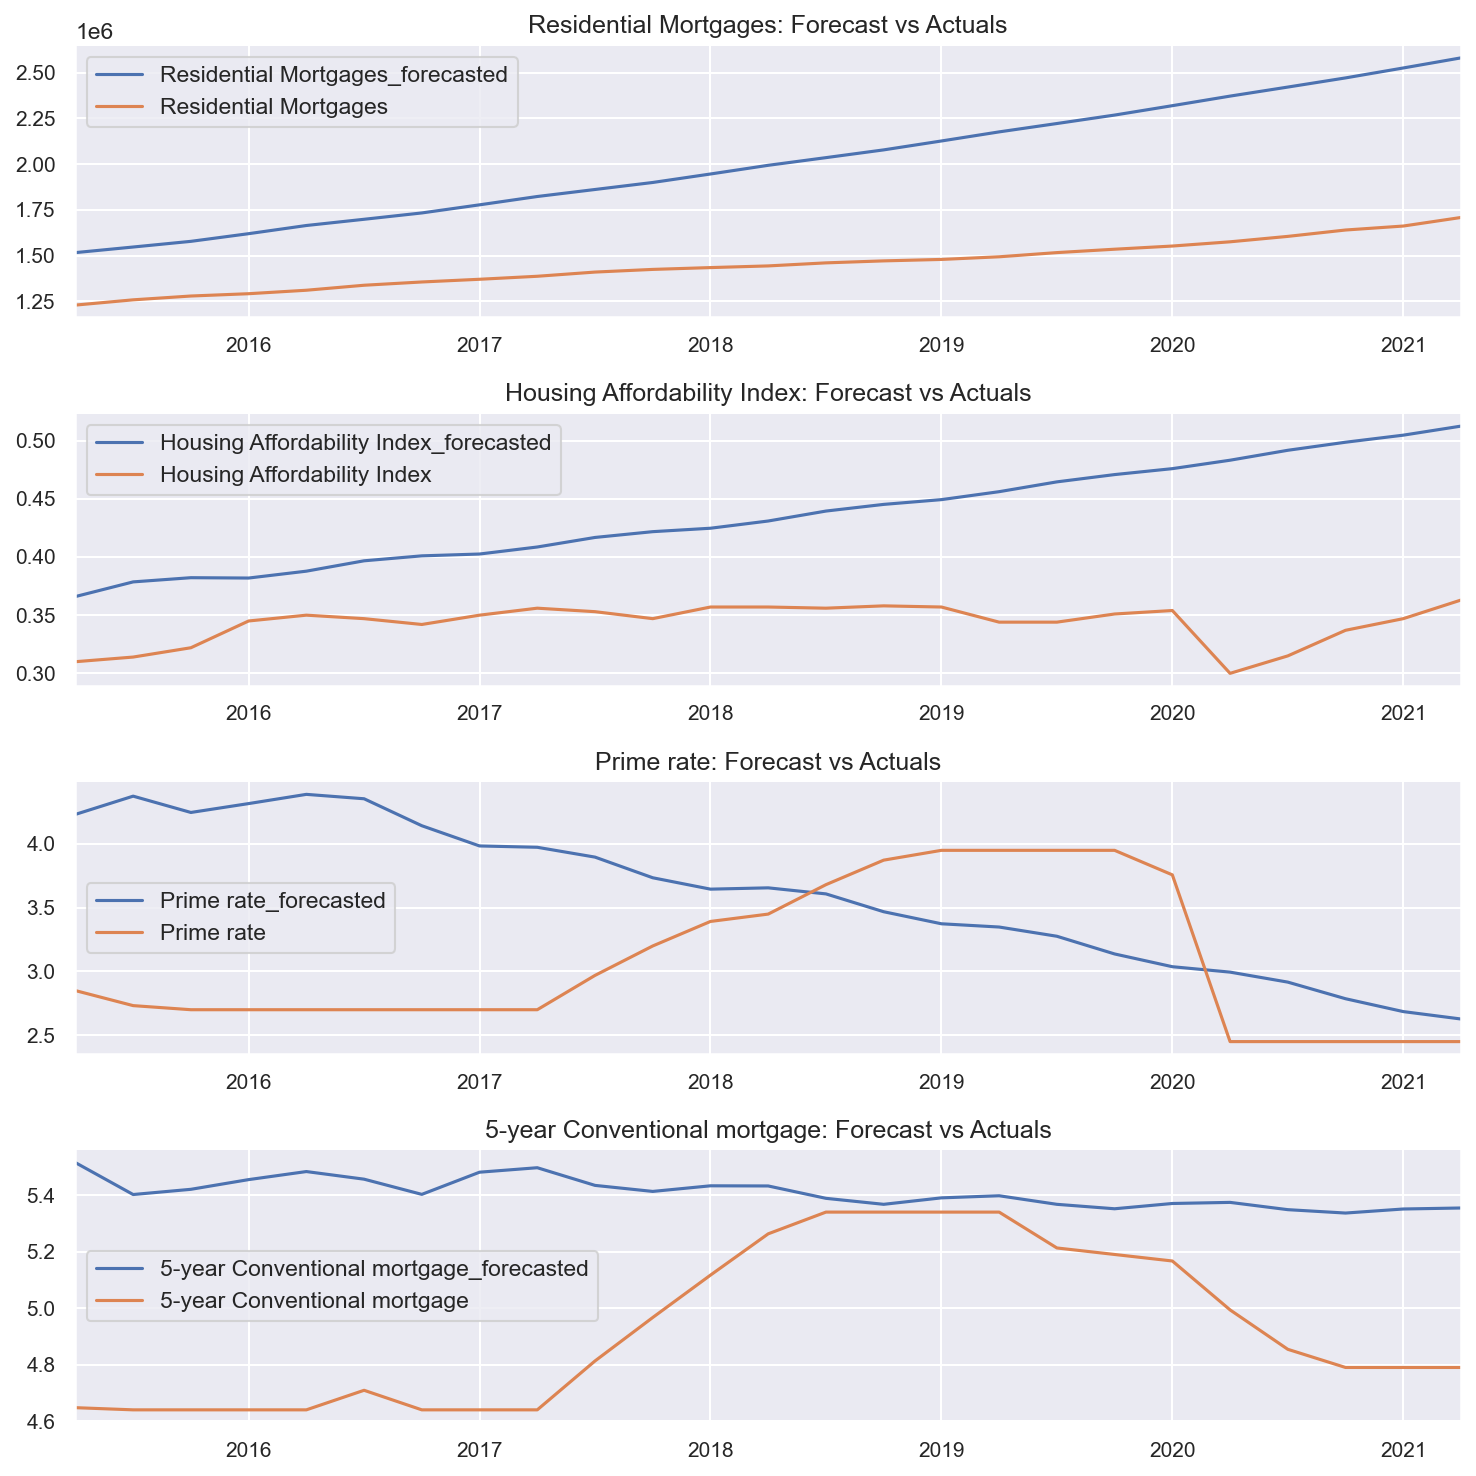

In [76]:
# plot forecast vs. actuals
fig, axes = plt.subplots(nrows=int(len(housing_analysis_combined_df.columns)), ncols=1, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(housing_analysis_combined_df.columns, axes.flatten())):
    df_forecast[col+'_forecasted'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    housing_analysis_combined_df[col][-nobs:].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout()

In [77]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

# print('Forecast Accuracy of: Residential Mortgages')
# accuracy_prod = forecast_accuracy(df_forecast['Residential Mortgages_forecasted'].values, df_test['Residential Mortgages'])
# #print(accuracy_prod)
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

print('Forecast Accuracy of: Housing Affordability Index')
accuracy_prod2 = forecast_accuracy(df_forecast['Housing Affordability Index_forecasted'].values, df_test['Housing Affordability Index'])
for k, v in accuracy_prod2.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Prime rate_forecasted')
accuracy_prod3 = forecast_accuracy(df_forecast['Prime rate_forecasted'].values, df_test['Prime rate'])
for k, v in accuracy_prod3.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: 5-year Conventional mortgage_forecasted')
accuracy_prod4 = forecast_accuracy(df_forecast['5-year Conventional mortgage_forecasted'].values, df_test['5-year Conventional mortgage'])
for k, v in accuracy_prod4.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Housing Affordability Index
mape :  inf
me :  0.4419
mae :  0.4419
mpe :  inf
rmse :  0.4445
corr :  0.0602
minmax :  1.0148

Forecast Accuracy of: Prime rate_forecasted
mape :  14.3828
me :  3.8999
mae :  3.8999
mpe :  -10.1292
rmse :  4.0832
corr :  -0.2696
minmax :  1.0733

Forecast Accuracy of: 5-year Conventional mortgage_forecasted
mape :  19.0417
me :  5.566
mae :  5.566
mpe :  -9.4086
rmse :  5.6216
corr :  0.118
minmax :  1.0292


In [78]:
# LIST ALL THE RMSE FOR THIS MODEL HERE 